# Titanic Disaster Survival Using Logistic Regression

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Exploration:

### a. Load the dataset and perform exploratory data analysis (EDA).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [3]:
train=pd.read_csv('Titanic_train.csv')

In [4]:
#check out first 10 rows of train data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### b. Examine the features, their types, and summary statistics.

In [5]:
# Info about data frame dimensions, column types, and file size
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Generate a summary of statistics for each numerical column of the data frame
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [8]:
pd.DataFrame({'Integer': ['Survived','Pclass','SibSp, Parch','-'],
              'Float': ['-','-','-','Age, Fare'],
              'Object': ['Sex, Name, Ticket, Cabin, Embarked','-','-','-']},
              index = ['Nominal','Ordinal','Discrete','Continuous'])

,Integer,Float,Object
Nominal,Survived,-,"Sex, Name, Ticket, Cabin, Embarked"
Ordinal,Pclass,-,-
Discrete,"SibSp, Parch",-,-
Continuous,-,"Age, Fare",-


### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features

<Axes: xlabel='Survived', ylabel='count'>

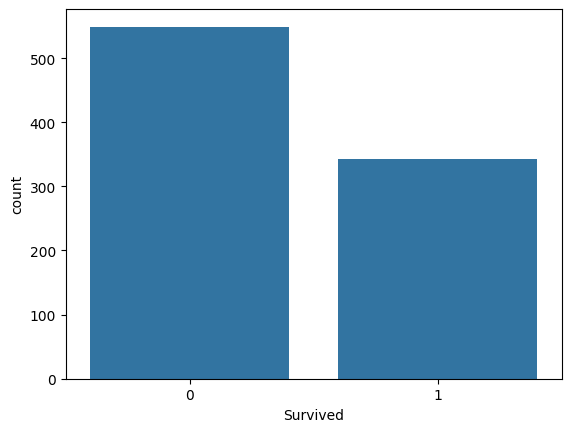

In [9]:
sns.countplot(data=train, x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

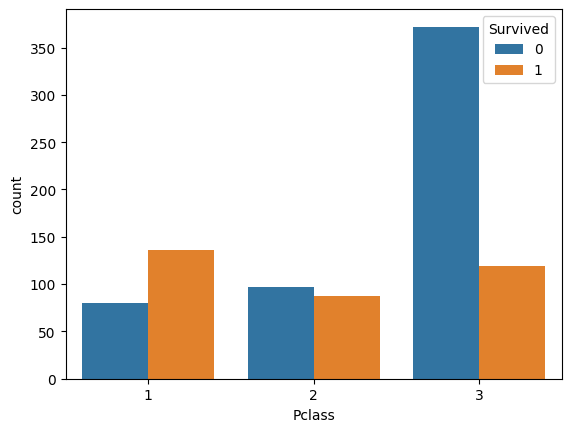

In [10]:
# explore the number of passengers that survived in each class (by splitting the Pclass column based on the Survived column)
sns.countplot(x='Pclass',hue='Survived',data=train)

# 2. Data Preprocessing

### a. Handle missing values

In [11]:
percent_of_null_values=train.isnull().sum()*100/len(train)
percent_of_null_values

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Only 3 columns out of 12 contain missing data. The Age column contains about 20% missing data, which can be dealt with using a technique called imputation, which can be done by imputing mean_age to the null values in Age column. Embarked is a categorical variable, so mode imputation can be done.

As for the Cabin variable containing 77% missing data, we can simply delete the column. More sophisticated methods would be to see how Cabin numbers relate to the Survived or Pclass column and deal with it accordingly. For example, some of the cabins could be located near where the lifeboats are stored, so passengers residing in those cabins could have a higher chance of survival.

In [12]:
#Inspect the passengers with missing age data:
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
mean_age = round(train['Age'].mean(),1)
print(mean_age)

29.7


In [14]:
train['Age'].replace(np.nan, mean_age, inplace=True)

In [15]:
#using mode method replace missing values of Embarked column
mode_embarked = train['Embarked'].mode()[0]
print(mode_embarked)

S


In [16]:
#In the first line, Python still thinks the mode-aggregated object is a DataSeries (one column of a DataFrame), so we need to select the string inside the DataSeries, hence the [0].
print(type(train['Embarked'].mode()))
print(type(train['Embarked'].mode()[0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [17]:
# look at missing values for Embarked column
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# replace them with mode
train['Embarked'].replace(np.nan, mode_embarked, inplace=True)

In [19]:
# check if replaced using iloc method
train.iloc[[61,829],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


### The remaining column with missing data is Cabin. This column contains 77% missing data, so the easiest method would be to get rid of it entirely.

In [20]:
train.drop(columns='Cabin', inplace=True)

In [21]:
# Check the dataset with all changes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### PassengerId, Name, Ticket and Embarked are going to be irrelevant for our simple analysis, so we drop those as well.

In [22]:
train.drop(columns=['PassengerId','Name','Ticket','Embarked'], inplace=True)

### b. Encode categorical variables

In [23]:
# check the data
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Let's convert the Sex column into numneric 1 - female, 0 - male

In [24]:
titanic_train = pd.get_dummies(train, columns=['Sex']).astype(int)

In [ ]:
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22,1,0,7,0,1
1,1,1,38,1,0,71,1,0
2,1,3,26,0,0,7,1,0
3,1,1,35,1,0,53,1,0
4,0,3,35,0,0,8,0,1


### Sex column is splitted into Sex_female and Sex_male. We will keep only 1 column Sex_male

In [25]:
# dropping sex_female column
titanic_train.drop('Sex_female', axis=1, inplace=True)

In [26]:
# check the updated data
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22,1,0,7,1
1,1,1,38,1,0,71,0
2,1,3,26,0,0,7,0
3,1,1,35,1,0,53,0
4,0,3,35,0,0,8,1


### Let's follow the same process of dumification for Pclass column

In [27]:
titanic_train = pd.get_dummies(titanic_train, columns=['Pclass'], drop_first=True).astype(int)

In [28]:
# check the data
titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3
0,0,22,1,0,7,1,0,1
1,1,38,1,0,71,0,0,0
2,1,26,0,0,7,0,0,1
3,1,35,1,0,53,0,0,0
4,0,35,0,0,8,1,0,1


## Pre-processing the test dataset

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [31]:
#load the test data
titanic_test = pd.read_csv('Titanic_test.csv')

In [32]:
# Inspect the test dataset
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
# check for null values
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### Handle missing values

In [35]:
# Cleaning Age column
mean_age_test = titanic_test['Age'].mean()
print(mean_age_test)

30.272590361445783


In [36]:
titanic_test['Age'].replace(np.nan, mean_age_test, inplace=True)

In [37]:
# Cleaning Fare column
mean_fare_test = titanic_test['Fare'].mean()
print(mean_fare_test)

35.627188489208635


In [38]:
titanic_test['Fare'].replace(np.nan, mean_fare_test, inplace=True)

In [39]:
# Remove irrelevant columns but keep a copy of PassengerId column
eye_dee = titanic_test['PassengerId']
titanic_test.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True)

In [40]:
# check the test data
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


In [41]:
# check null values after imputation
titanic_test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


### Encode categorical variables

In [42]:
# One-hot encoding Pclass and Sex
titanic_test = pd.get_dummies(data=titanic_test, columns=['Pclass','Sex'], drop_first=True).astype(int)

In [43]:
titanic_test.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,34,0,0,7,0,1,1
1,47,1,0,7,0,1,0
2,62,0,0,9,1,0,1
3,27,0,0,8,0,1,1
4,22,1,1,12,0,1,0


# 3. Model Building:

### a. Build a logistic regression model using appropriate libraries

In [44]:
# independent varibles, represented by a capital X; dependent variables represented by lowercase y
X_train = titanic_train.iloc[:,1:]
y_train = titanic_train['Survived']
X_test = titanic_test

### b. Train the model using the training data

In [45]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression

In [46]:
# Specify the optimisation algorithm as 'lbfgs' (to silence the warning)
logistic_model = LogisticRegression(solver='lbfgs')

In [47]:
#train the model
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Get the list of columns from X_train
feature_names = X_train.columns

# Ensure X_test has the same columns in the same order
X_test = X_test[feature_names]

# Now you should be able to make predictions
pred = logistic_model.predict(X_test)

In [50]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
len(pred)

418

In [52]:
type(pred)

numpy.ndarray

These are the predictions of survival made by the algorithm for each of the 418 passengers in the test dataset. The values are within a numerical array, so we need to put them into a data series

In [54]:
predictions = pd.Series(data=pred, name='Survived')
predictions.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [55]:
#attach the PassengerId column with the predictions
sub = pd.concat([eye_dee, predictions], axis=1)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [57]:
#Prediction
# Save the predictions to a CSV file
predict=sub.to_csv('titanic_predictions.csv', index=False)
predict

# 4. Model Evaluation

### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Make predictions on the training set for evaluation
y_pred_train = logistic_model.predict(X_train)

# Accuracy
accuracy = accuracy_score(y_train, y_pred_train)

# Precision
precision = precision_score(y_train, y_pred_train)

# Recall
recall = recall_score(y_train, y_pred_train)

# F1 Score
f1 = f1_score(y_train, y_pred_train)

# ROC-AUC Score
roc_auc = roc_auc_score(y_train, logistic_model.predict_proba(X_train)[:, 1])

# Print all the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.8002244668911336
Precision: 0.7697368421052632
Recall: 0.6842105263157895
F1 Score: 0.7244582043343654
ROC-AUC Score: 0.8549835426453201


### b. Visualize the ROC curve

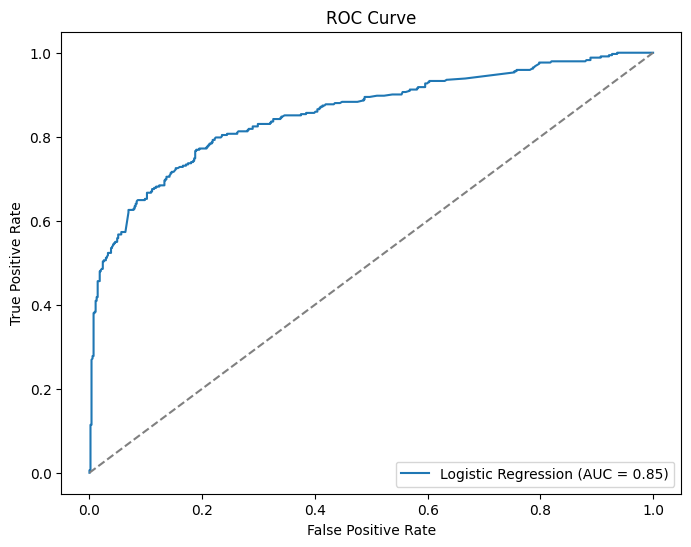

In [61]:
# Get the predicted probabilities for the positive class
y_pred_proba = logistic_model.predict_proba(X_train)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Interpretation

### a. Interpret the coefficients of the logistic regression model

In [62]:
# Get the coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logistic_model.coef_[0]
})

# Display the coefficients sorted by absolute value (most impactful features)
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=False)

print(coefficients)

    Feature  Coefficient  abs_coefficient
4  Sex_male    -2.629185         2.629185
6  Pclass_3    -1.910226         1.910226
5  Pclass_2    -0.815351         0.815351
1     SibSp    -0.337185         0.337185
2     Parch    -0.106307         0.106307
0       Age    -0.037052         0.037052
3      Fare     0.003989         0.003989
